# van der Pol Oscillator

This notebook solves the van der Pol equations for a nonlinear oscillator.

The equation of motion for this oscillator is
$$
\ddot x - \mu(1-x^2)\dot x + x = 0.
$$

In [1]:
using DifferentialEquations
using Plots

In [2]:
function deqs!(du, u, p, t)
    mu = p[1]
    du[1] = u[2]
    du[2] = mu*(1.0-u[1]*u[1])*u[2] - u[1]
end

deqs! (generic function with 1 method)

In [3]:
# parameters and initial conditions
p0 = [5.0]
u0 = [2.0, 0.0]

2-element Vector{Float64}:
 2.0
 0.0

In [4]:
tspan=(0.0, 1000.0)
prob = ODEProblem(deqs!, u0, tspan, p0)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 1000.0)
u0: 2-element Vector{Float64}:
 2.0
 0.0

In [5]:
#alg = ABM54()
#alg = Vern9()
#alg = Euler()
#alg = Tsit5()
#alg = VCABM()
#alg = lsoda()
alg = RK4()
#alg = Midpoint()
#alg = Vern7()
#alg = Rosenbrock32()
adapt = false
outdx = 0.01

0.01

In [6]:
sol = solve(prob, alg, reltol=1.0e-12, abstol=1.0e-12, adaptive=adapt, saveat=outdx, dt=0.002);

In [7]:
tt = sol.t
s1 = sol[1,:]
s2 = sol[2,:];

In [8]:
plot(tt,s1,
    lw=2,
    grid = :off,
    xtickfont=font(12),
    ytickfont=font(12),
    guidefont=font(12),
    linecolor=:blue,
    #legend=false,
    xlims=(0.0,50.0)
    )
plot!(tt,s2,label="s2",linecolor=:green,lw=2)

In [9]:
adapt = false
tol = 1.0e-8
dt32 = 0.1
dt16 = dt32/2.0
dt8 = dt16/2.0
dt4 = dt8/2.0
dt2 = dt4/2.0
dt1 = dt2/2.0
sol32 = solve(prob, alg, reltol=tol, abstol=tol, adaptive=adapt, saveat=0.1, dt=dt32);
sol16 = solve(prob, alg, reltol=tol, abstol=tol, adaptive=adapt, saveat=0.1, dt=dt16);
sol8 = solve(prob, alg, reltol=tol, abstol=tol, adaptive=adapt, saveat=0.1, dt=dt8);
sol4 = solve(prob, alg, reltol=tol, abstol=tol, adaptive=adapt, saveat=0.1, dt=dt4);
sol2 = solve(prob, alg, reltol=tol, abstol=tol, adaptive=adapt, saveat=0.1, dt=dt2);
sol1 = solve(prob, alg, reltol=tol, abstol=tol, adaptive=adapt, saveat=0.1, dt=dt1);

In [10]:
s32 = sol32[1,:]
s16 = sol16[1,:]
s8 = sol8[1,:]
s4 = sol4[1,:]
s2 = sol2[1,:]
s1 = sol1[1,:]
d1 = similar(s1)
d2 = similar(s2)
d4 = similar(s4)
d8 = similar(s8)
d16 = similar(s16)
epsilon = 1.0e-17
@. d1 = abs(s1 - s2) + epsilon
@. d2 = abs(s2 - s4) + epsilon
@. d4 = abs(s4 - s8) + epsilon
@. d8 = abs(s8 - s16) + epsilon
@. d16 = abs(s16 - s32) + epsilon;
tt = sol1.t;

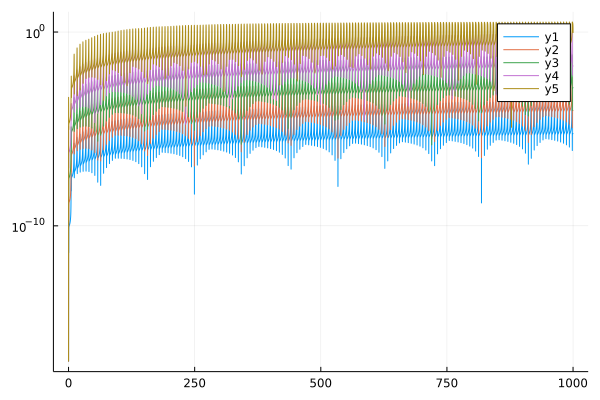

In [11]:
plot(tt, d1)
plot!(tt, d2)
plot!(tt, d4)
plot!(tt, d8)
plot!(tt, d16,yaxis=:log)

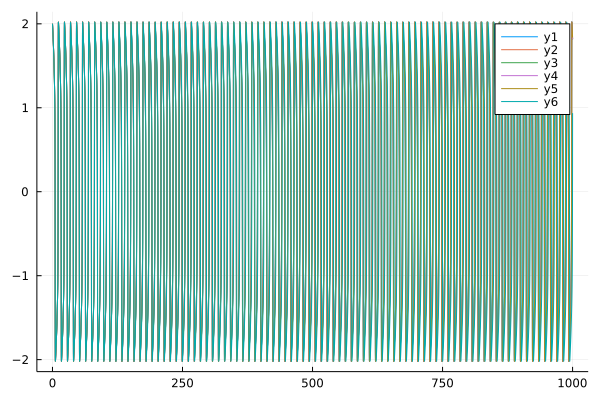

In [12]:
plot(tt,[s1,s2,s4,s8,s16,s32])

In [13]:
t32 = sol32[2,:]
t16 = sol16[2,:]
t8 = sol8[2,:]
t4 = sol4[2,:]
t2 = sol2[2,:]
t1 = sol1[2,:];

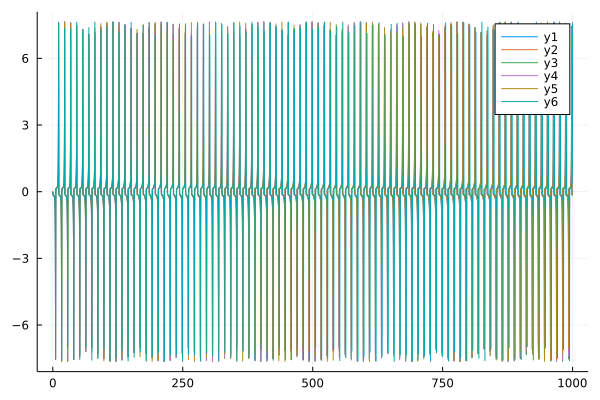

In [14]:
plot(tt,[t1,t2,t4,t8,t16,t32])